The forecasting for the year 2021 will be done using the SARIMA model, as the data as can be deduced from the graphs in the Visualization notebook has seasonality, and has a trend, so it isn't stationary.
The pmdarima library will be used to search for the best fitting paramters to pass for the SARIMA model.
The data forecasting will be applied on each category separately, using the year 2020 values to test the model performance, then forecasting for the year 2021.

In [146]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pmdarima.arima.utils import ndiffs, nsdiffs

In [16]:
df = pd.read_csv('processed_dataframe.csv', index_col='DATE', parse_dates=True)
df.head()

,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
DATE,,,
2000-01-01,78.0,835.0,3448.0
2000-02-01,53.0,890.0,3181.0
2000-03-01,73.0,974.0,3783.0
2000-04-01,78.0,834.0,3317.0
2000-05-01,96.0,1086.0,4123.0


Now separating each category in a dataframe, and adding them into a dictionary

In [149]:
Alkohol_df = df[['Alkoholunfälle']]
Flucht_df = df[['Fluchtunfälle']]
Verkehrs_df = df[['Verkehrsunfälle']]
dataframes = {'Alkoholunfälle': Alkohol_df, 'Fluchtunfälle': Flucht_df, 'Verkehrsunfälle': Verkehrs_df}

The next step is to estimate the the number of required differences and seasonal differences, if any. the values will be passed as parameters for the 'auto_arima' class to estimate the orders for AR and MA for both the time series and seasonality (p, q, P and Q)

In [156]:
ndiff_estimated = {category:[] for category in dataframes.keys()}
for category, dataframe in dataframes.items():
    ndiff_estimated[category].append(ndiffs(dataframe, max_d=3))
    ndiff_estimated[category].append(nsdiffs(dataframe, max_D=3, m=12))

In [164]:
for key, value in ndiff_estimated.items())

<generator object <genexpr> at 0x000001FB007CB820>


{'Alkoholunfälle': [], 'Fluchtunfälle': [], 'Verkehrsunfälle': []}

In [144]:
D

0

In [131]:
print(n_adf, n_kpss, n_pp)

0 1 0


In [136]:
model1 = pm.auto_arima(Verkehrs_df, seasonal=True, m=12, max_p=3, max_q=3,
                       max_Q=3, max_P=3, max_D=3, max_d=3, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True) 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3863.446, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3642.865, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3653.615, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3861.456, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3794.308, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3627.383, Time=0.38 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3589.403, Time=1.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3586.558, Time=0.41 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3704.825, Time=0.14 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3587.488, Time=1.01 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3682.070, Time=0.37 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept

In [102]:
model = SARIMAX(Alkohol_df, order=(1,1,2), seasonal_order=(1,1,2,12))
results = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


(1, 0, 1, 12)

In [104]:
predict = results.get_prediction(start=-12)

In [105]:
mean = predict.predicted_mean

In [106]:
mean

2020-01-01    24.666248
2020-02-01    24.956912
2020-03-01    35.929905
2020-04-01    31.761157
2020-05-01    38.244003
2020-06-01    41.159640
2020-07-01    51.552973
2020-08-01    40.975514
2020-09-01    47.467620
2020-10-01    41.222063
2020-11-01    33.717817
2020-12-01    31.675202
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='DATE'>

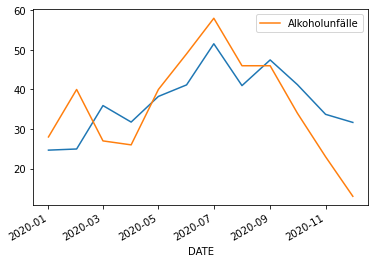

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(mean.index, mean)
Alkohol_df.loc['2020':].plot(ax=ax)

In [88]:
df.shape

(252, 3)